In [8]:
# imports
import os, random, cv2
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def create_binary_masks(image_array):
    binary_masks = []
    
    for image in image_array:
        
        if image.ndim == 2:
            image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        elif image.shape[2] != 3:
            raise ValueError("Input image must have 3 channels (BGR format).")
        else:
            image_color = image
        
        hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

        lower_red = np.array([0, 150, 105])
        upper_red = np.array([255, 255, 255])

        mask = cv2.inRange(hsv, lower_red, upper_red)

        res = cv2.bitwise_and(image_color, image_color, mask=mask)
        
        binary_masks.append(mask)
        
    return binary_masks

def read_images_to_array(folder_path):

  image_array = []
  # Get a sorted list of filenames
  filenames = sorted(os.listdir(folder_path))
  for filename in filenames:
    if filename.endswith(".jpg") or filename.endswith(".png"):
      img_path = os.path.join(folder_path, filename)
      img = cv2.imread(img_path)

      if img is not None:
        image_array.append(img)

  return image_array

def split_images(image_array): 

    red_region_images = []
    raw_images = [] 

    for image in image_array:
        if image[25,100].sum() == 255*3 :
            red_region_images.append(image)
        else: 
            raw_images.append(image) 
            
    return red_region_images, raw_images

In [84]:
images = read_images_to_array('./data/images/')
masks, raw = split_images(images)
og = masks 
masks = create_binary_masks(masks)

Visualize Masks to adjust the create_binary_mask function

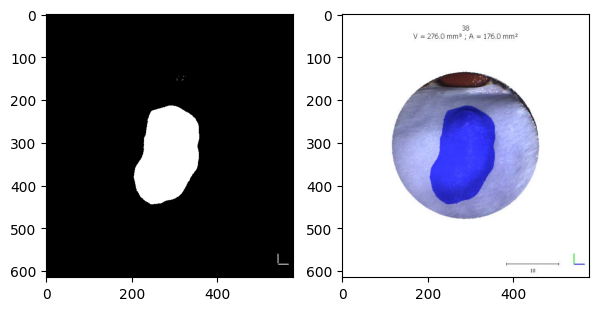

In [85]:
rand = random.randint(0, len(masks) -1)
rand = 10

fig, ax = plt.subplots(1,2, figsize=[7,7])

ax[0].imshow(masks[rand], cmap="gray")
ax[1].imshow(og[rand])